# Displacements due to pressure variations in reservoir

This code aims at reproducing the results presented by Muñoz and Roehl (2017, figs 7 and 8)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker

In [2]:
import compaction as cp

In [3]:
# Define the model
shape = (50, 50)
model = cp.prism_layer_circular((0,0), 500, shape, 850, 750)

In [4]:
model[0]

array([-500., -480., -100.,  -80.,  850.,  750.])

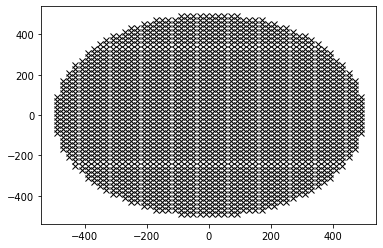

In [7]:
plt.figure()
for m in model:
    yc = 0.5*(m[0]+m[1])
    xc = 0.5*(m[2]+m[3])
    plt.plot(yc, xc, 'kx')
plt.show()

In [8]:
# Pressure variation (in MPa)
DP = np.zeros(len(model)) - 10

In [ ]:
# Young’s modulus (in MPa)
young = 33000

# Poisson coefficient
poisson = 0.25

In [ ]:
# Define computation points on vertical plane at y = 0m
shape = (300, 120)
x = np.linspace(-1500, 1500, shape[0])
z = np.linspace(0, 1200, shape[1])
x, z = np.meshgrid(x, z)
x = x.ravel()
z = z.ravel()
y = np.zeros_like(x)
coordinates = np.vstack([y, x, z])

In [ ]:
coordinates.shape

### Compute the displacement components by using Muñoz and Roehl (2017)

In [ ]:
# Compute the x-component
u_x1 = cp.displacement(coordinates, model, DP, poisson, young, field='u_x1_MR')

u_x2 = cp.displacement(coordinates, model, DP, poisson, young, field='u_x2_MR')

u_xz2 = cp.displacement(coordinates, model, DP, poisson, young, field='u_xz2_MR')

u_x = u_x1 + (3 - 4*poisson)*u_x2 + u_xz2

In [ ]:
# Compute the y-component
u_y1 = cp.displacement(coordinates, model, DP, poisson, young, field='u_y1_MR')

u_y2 = cp.displacement(coordinates, model, DP, poisson, young, field='u_y2_MR')

u_yz2 = cp.displacement(coordinates, model, DP, poisson, young, field='u_yz2_MR')

u_y = u_y1 + (3 - 4*poisson)*u_y2 + u_yz2

In [ ]:
# Compute the z-component
u_z1 = cp.displacement(coordinates, model, DP, poisson, young, field='u_z1_MR')

u_z2 = cp.displacement(coordinates, model, DP, poisson, young, field='u_z2_MR')

u_zz2 = cp.displacement(coordinates, model, DP, poisson, young, field='u_zz2_MR')

u_z = u_z1 + (3 - 4*poisson)*u_z2 + u_zz2

### Compute the displacement components by using Nagy et al. (2000)

In [ ]:
# Compute the x-component
u_x1_NA = cp.displacement(coordinates, model, DP, poisson, young, field='u_x1_NA')

u_x2_NA = cp.displacement(coordinates, model, DP, poisson, young, field='u_x2_NA')

u_xz2_NA = cp.displacement(coordinates, model, DP, poisson, young, field='u_xz2_NA')

u_x_NA = u_x1_NA + (3 - 4*poisson)*u_x2_NA + u_xz2_NA

### Results obtained for x-component obtained with Muñoz and Roehl (2017)

In [ ]:
# Plot the results on a map
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(12,10))

ax[0,0].set_aspect("equal")
# Get the maximum absolute value so we can center the colorbar on zero
maxabs = np.max(np.abs(u_x1))
img = ax[0,0].contourf(coordinates[0].reshape(shape), 
                  coordinates[1].reshape(shape), 
                  u_x1.reshape(shape), 
                  60, vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(img, ax=ax[0,0], pad=0.04, shrink=0.73, label="m")
ax[0,0].set_title("x-component first system")

ax[0,0].set_xticklabels(ax[0,0].get_xticks())
ax[0,0].set_yticklabels(ax[0,0].get_yticks())
ax[0,0].set_xlabel("y (m)")
ax[0,0].set_ylabel("x (m)")

ax[0,1].set_aspect("equal")
# Get the maximum absolute value so we can center the colorbar on zero
maxabs = np.max(np.abs(u_x2))
img = ax[0,1].contourf(coordinates[0].reshape(shape), 
                  coordinates[1].reshape(shape), 
                  u_x2.reshape(shape), 
                  60, vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(img, ax=ax[0,1], pad=0.04, shrink=0.73, label="m")
ax[0,1].set_title("x-component second system")

ax[0,1].set_xticklabels(ax[0,1].get_xticks())
ax[0,1].set_yticklabels(ax[0,1].get_yticks())
ax[0,1].set_xlabel("y (m)")
ax[0,1].set_ylabel("x (m)")

ax[1,0].set_aspect("equal")
# Get the maximum absolute value so we can center the colorbar on zero
maxabs = np.max(np.abs(u_xz2))
img = ax[1,0].contourf(coordinates[0].reshape(shape), 
                  coordinates[1].reshape(shape), 
                  u_xz2.reshape(shape), 
                  60, vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(img, ax=ax[1,0], pad=0.04, shrink=0.73, label="m")
ax[1,0].set_title("xz-component second system")

ax[1,0].set_xticklabels(ax[1,0].get_xticks())
ax[1,0].set_yticklabels(ax[1,0].get_yticks())
ax[1,0].set_xlabel("y (m)")
ax[1,0].set_ylabel("x (m)")

ax[1,1].set_aspect("equal")
# Get the maximum absolute value so we can center the colorbar on zero
maxabs = np.max(np.abs(u_x))
img = ax[1,1].contourf(coordinates[0].reshape(shape), 
                  coordinates[1].reshape(shape), 
                  u_x.reshape(shape), 
                  60, vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(img, ax=ax[1,1], pad=0.04, shrink=0.73, label="m")
ax[1,1].set_title("x-component of displacement")

ax[1,1].set_xticklabels(ax[1,1].get_xticks())
ax[1,1].set_yticklabels(ax[1,1].get_yticks())
ax[1,1].set_xlabel("y (m)")
ax[1,1].set_ylabel("x (m)")


plt.tight_layout()
plt.show()

### Results obtained for x-component obtained with Nagy et al. (2000)

In [ ]:
# Plot the results on a map
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(12,10))

ax[0,0].set_aspect("equal")
# Get the maximum absolute value so we can center the colorbar on zero
maxabs = np.max(np.abs(u_x1_NA))
img = ax[0,0].contourf(coordinates[0].reshape(shape), 
                  coordinates[1].reshape(shape), 
                  u_x1_NA.reshape(shape), 
                  60, vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(img, ax=ax[0,0], pad=0.04, shrink=0.73, label="m")
ax[0,0].set_title("x-component first system")

ax[0,0].set_xticklabels(ax[0,0].get_xticks())
ax[0,0].set_yticklabels(ax[0,0].get_yticks())
ax[0,0].set_xlabel("y (m)")
ax[0,0].set_ylabel("x (m)")

ax[0,1].set_aspect("equal")
# Get the maximum absolute value so we can center the colorbar on zero
maxabs = np.max(np.abs(u_x2_NA))
img = ax[0,1].contourf(coordinates[0].reshape(shape), 
                  coordinates[1].reshape(shape), 
                  u_x2_NA.reshape(shape), 
                  60, vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(img, ax=ax[0,1], pad=0.04, shrink=0.73, label="m")
ax[0,1].set_title("x-component second system")

ax[0,1].set_xticklabels(ax[0,1].get_xticks())
ax[0,1].set_yticklabels(ax[0,1].get_yticks())
ax[0,1].set_xlabel("y (m)")
ax[0,1].set_ylabel("x (m)")

ax[1,0].set_aspect("equal")
# Get the maximum absolute value so we can center the colorbar on zero
maxabs = np.max(np.abs(u_xz2_NA))
img = ax[1,0].contourf(coordinates[0].reshape(shape), 
                  coordinates[1].reshape(shape), 
                  u_xz2_NA.reshape(shape), 
                  60, vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(img, ax=ax[1,0], pad=0.04, shrink=0.73, label="m")
ax[1,0].set_title("xz-component second system")

ax[1,0].set_xticklabels(ax[1,0].get_xticks())
ax[1,0].set_yticklabels(ax[1,0].get_yticks())
ax[1,0].set_xlabel("y (m)")
ax[1,0].set_ylabel("x (m)")

ax[1,1].set_aspect("equal")
# Get the maximum absolute value so we can center the colorbar on zero
maxabs = np.max(np.abs(u_x_NA))
img = ax[1,1].contourf(coordinates[0].reshape(shape), 
                  coordinates[1].reshape(shape), 
                  u_x_NA.reshape(shape), 
                  60, vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(img, ax=ax[1,1], pad=0.04, shrink=0.73, label="m")
ax[1,1].set_title("x-component of displacement")

ax[1,1].set_xticklabels(ax[1,1].get_xticks())
ax[1,1].set_yticklabels(ax[1,1].get_yticks())
ax[1,1].set_xlabel("y (m)")
ax[1,1].set_ylabel("x (m)")


plt.tight_layout()
plt.show()

### Comparison of computed x-component on the profile y = 0 m

In [ ]:
# Plot the results on a profile at y = 0m
profile = (y == 0)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x[profile], u_x_NA[profile], 'k-', label='Nagy et al')
plt.plot(x[profile], u_x[profile], 'r--', label='Muñoz and Roehl')
ax.set_xlabel("x (m)")
ax.set_ylabel("x-component displacement (m)")
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()

### Results obtained for y-component obtained with Muñoz and Roehl (2017)

In [ ]:
# Plot the results on a map
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(12,10))

ax[0,0].set_aspect("equal")
# Get the maximum absolute value so we can center the colorbar on zero
maxabs = np.max(np.abs(u_y1))
img = ax[0,0].contourf(coordinates[0].reshape(shape), 
                  coordinates[1].reshape(shape), 
                  u_y1.reshape(shape), 
                  60, vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(img, ax=ax[0,0], pad=0.04, shrink=0.73, label="m")
ax[0,0].set_title("y-component first system")

ax[0,0].set_xticklabels(ax[0,0].get_xticks())
ax[0,0].set_yticklabels(ax[0,0].get_yticks())
ax[0,0].set_xlabel("y (m)")
ax[0,0].set_ylabel("x (m)")

ax[0,1].set_aspect("equal")
# Get the maximum absolute value so we can center the colorbar on zero
maxabs = np.max(np.abs(u_y2))
img = ax[0,1].contourf(coordinates[0].reshape(shape), 
                  coordinates[1].reshape(shape), 
                  u_y2.reshape(shape), 
                  60, vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(img, ax=ax[0,1], pad=0.04, shrink=0.73, label="m")
ax[0,1].set_title("y-component second system")

ax[0,1].set_xticklabels(ax[0,1].get_xticks())
ax[0,1].set_yticklabels(ax[0,1].get_yticks())
ax[0,1].set_xlabel("y (m)")
ax[0,1].set_ylabel("x (m)")

ax[1,0].set_aspect("equal")
# Get the maximum absolute value so we can center the colorbar on zero
maxabs = np.max(np.abs(u_yz2))
img = ax[1,0].contourf(coordinates[0].reshape(shape), 
                  coordinates[1].reshape(shape), 
                  u_yz2.reshape(shape), 
                  60, vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(img, ax=ax[1,0], pad=0.04, shrink=0.73, label="m")
ax[1,0].set_title("yz-component second system")

ax[1,0].set_xticklabels(ax[1,0].get_xticks())
ax[1,0].set_yticklabels(ax[1,0].get_yticks())
ax[1,0].set_xlabel("y (m)")
ax[1,0].set_ylabel("x (m)")

ax[1,1].set_aspect("equal")
# Get the maximum absolute value so we can center the colorbar on zero
maxabs = np.max(np.abs(u_y))
img = ax[1,1].contourf(coordinates[0].reshape(shape), 
                  coordinates[1].reshape(shape), 
                  u_y.reshape(shape), 
                  60, vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(img, ax=ax[1,1], pad=0.04, shrink=0.73, label="m")
ax[1,1].set_title("y-component of displacement")

ax[1,1].set_xticklabels(ax[1,1].get_xticks())
ax[1,1].set_yticklabels(ax[1,1].get_yticks())
ax[1,1].set_xlabel("y (m)")
ax[1,1].set_ylabel("x (m)")


plt.tight_layout()
plt.show()

### Results obtained for z-component obtained with Muñoz and Roehl (2017)

In [ ]:
# Plot the results on a map
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(12,10))

ax[0,0].set_aspect("equal")
# Get the maximum absolute value so we can center the colorbar on zero
maxabs = np.max(np.abs(u_z1))
img = ax[0,0].contourf(coordinates[0].reshape(shape), 
                  coordinates[1].reshape(shape), 
                  u_z1.reshape(shape), 
                  60, vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(img, ax=ax[0,0], pad=0.04, shrink=0.73, label="m")
ax[0,0].set_title("z-component first system")

ax[0,0].set_xticklabels(ax[0,0].get_xticks())
ax[0,0].set_yticklabels(ax[0,0].get_yticks())
ax[0,0].set_xlabel("y (m)")
ax[0,0].set_ylabel("x (m)")

ax[0,1].set_aspect("equal")
# Get the maximum absolute value so we can center the colorbar on zero
maxabs = np.max(np.abs(u_z2))
img = ax[0,1].contourf(coordinates[0].reshape(shape), 
                  coordinates[1].reshape(shape), 
                  u_z2.reshape(shape), 
                  60, vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(img, ax=ax[0,1], pad=0.04, shrink=0.73, label="m")
ax[0,1].set_title("z-component second system")

ax[0,1].set_xticklabels(ax[0,1].get_xticks())
ax[0,1].set_yticklabels(ax[0,1].get_yticks())
ax[0,1].set_xlabel("y (m)")
ax[0,1].set_ylabel("x (m)")

ax[1,0].set_aspect("equal")
# Get the maximum absolute value so we can center the colorbar on zero
maxabs = np.max(np.abs(u_zz2))
img = ax[1,0].contourf(coordinates[0].reshape(shape), 
                  coordinates[1].reshape(shape), 
                  u_zz2.reshape(shape), 
                  60, vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(img, ax=ax[1,0], pad=0.04, shrink=0.73, label="m")
ax[1,0].set_title("zz-component second system")

ax[1,0].set_xticklabels(ax[1,0].get_xticks())
ax[1,0].set_yticklabels(ax[1,0].get_yticks())
ax[1,0].set_xlabel("y (m)")
ax[1,0].set_ylabel("x (m)")

ax[1,1].set_aspect("equal")
# Get the maximum absolute value so we can center the colorbar on zero
maxabs = np.max(np.abs(u_z))
img = ax[1,1].contourf(coordinates[0].reshape(shape), 
                  coordinates[1].reshape(shape), 
                  u_z.reshape(shape), 
                  60, vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(img, ax=ax[1,1], pad=0.04, shrink=0.73, label="m")
ax[1,1].set_title("z-component of displacement")

ax[1,1].set_xticklabels(ax[1,1].get_xticks())
ax[1,1].set_yticklabels(ax[1,1].get_yticks())
ax[1,1].set_xlabel("y (m)")
ax[1,1].set_ylabel("x (m)")


plt.tight_layout()
plt.show()